Okay

In [2]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
def count_files_by_labels(directory):
    '''
    Count the number of files in a directory for each label.
    
    :param directory: The directory containing the files
    :return: A dictionary with labels as keys and file counts as values
    '''
    file_counts = {}
    files = os.listdir(directory)

    for file in files:
        if file.endswith('.csv'):
            label = file.split('.')[0]  # Assuming the label is the part before the first '.'
            file_counts[label] = file_counts.get(label, 0) + 1

    return file_counts

# Example usage
directory = './data'  # Replace with your data directory
file_counts = count_files_by_labels(directory)

for label, count in file_counts.items():
    print(f''{label}': {count}')

'fan_2': 100
'idle': 100
'fan_1': 100


In [3]:
def randomly_select_file(directory, label):
    files = [f for f in os.listdir(directory) if f.startswith(label) and f.endswith('.csv')]

    # Randomly select one file from the filtered list
    if files:
        selected_file = random.choice(files)
        return os.path.join(directory, selected_file)
    else:
        return None

# Load the dataset
label = 'fan_2'  # Replace with your desired label
selected_file = randomly_select_file('./data', label)

print(f'Selected file: {selected_file}')

data = pd.read_csv(selected_file)
# Display the first few rows of the dataset
data.head()

Selected file: ./data/fan_2.z6crj00r40ay.csv


,timestamp,accelX,accelY,accelZ,gyroX,gyroY,gyroZ
0,11,3.76,7.64,3.12,0.04,0.01,0.00
1,23,4.45,9.16,4.77,0.01,0.01,-0.02
2,36,5.26,9.03,3.51,-0.01,0.01,-0.02
3,49,4.23,8.64,4.27,-0.02,-0.00,0.00
4,62,1.43,10.08,4.47,-0.01,-0.04,0.04


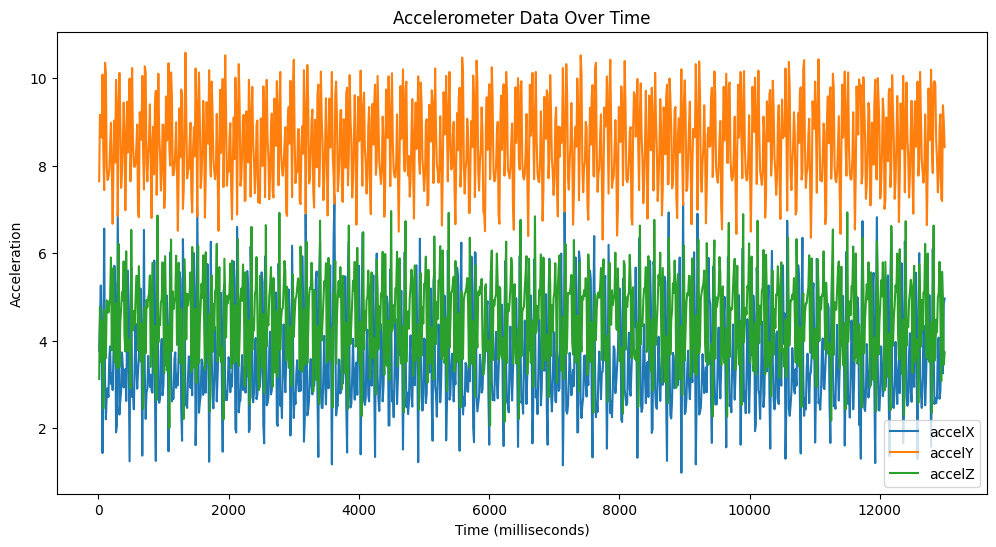

In [7]:
# Plotting the Accelerometer Data
plt.figure(figsize=(12, 6))
plt.plot(data.iloc[:, 0], data.iloc[:, 1], label='Accel X')
plt.plot(data.iloc[:, 0], data.iloc[:, 2], label='Accel Y')
plt.plot(data.iloc[:, 0], data.iloc[:, 3], label='Accel Z')
plt.title('Accelerometer Data Over Time')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Acceleration')
plt.legend()
plt.show()

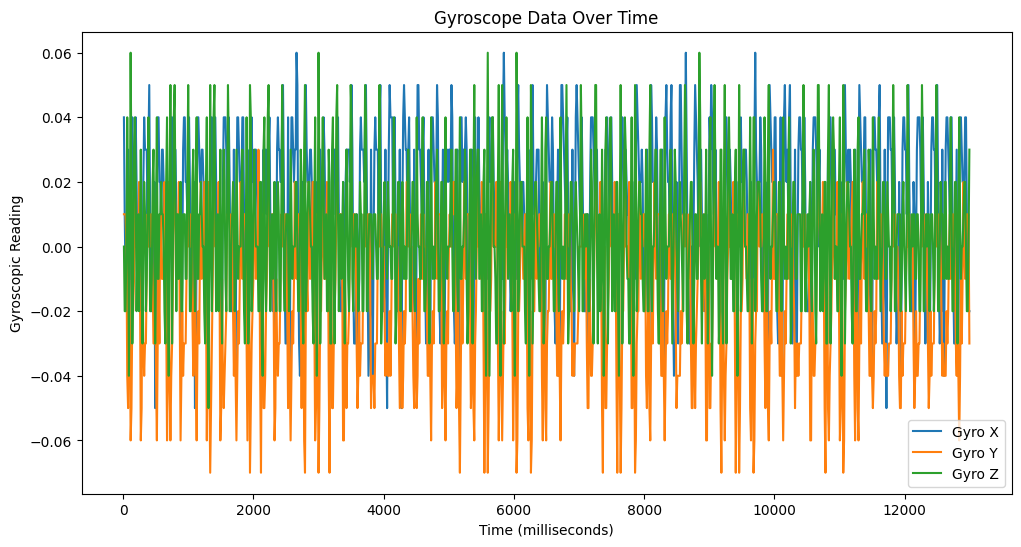

In [10]:
# Plotting the Gyroscope Data
plt.figure(figsize=(12, 6))
plt.plot(data.iloc[:, 0], data.iloc[:, 4], label='Gyro X')
plt.plot(data.iloc[:, 0], data.iloc[:, 5], label='Gyro Y')
plt.plot(data.iloc[:, 0], data.iloc[:, 6], label='Gyro Z')
plt.title('Gyroscope Data Over Time')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Gyroscopic Reading')
plt.legend()
plt.show()

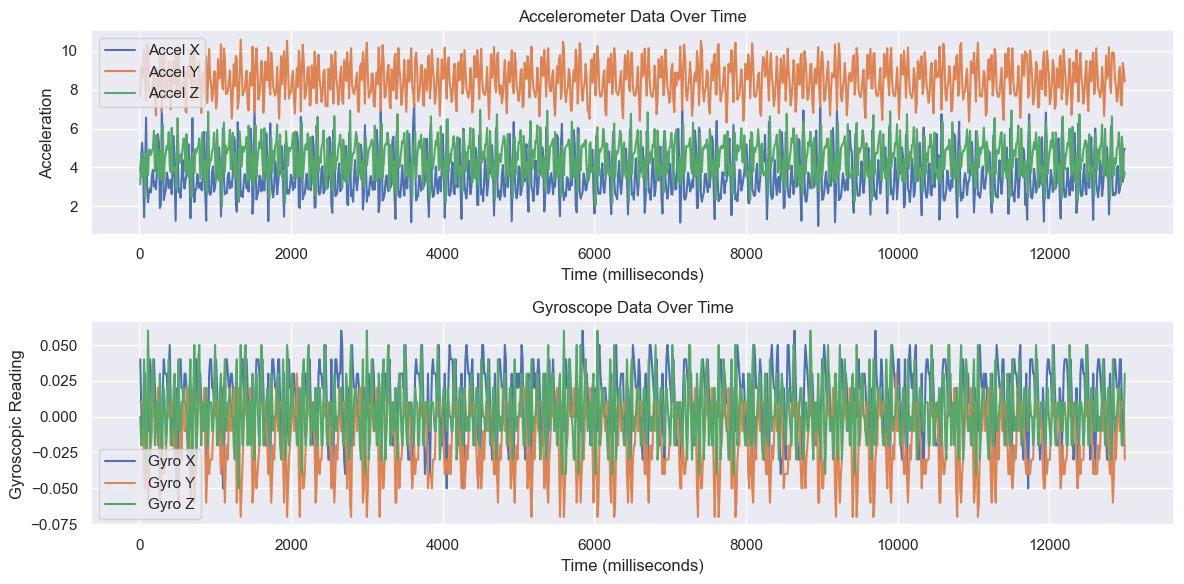

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset again
data = pd.read_csv(selected_file)

# Setting the theme for seaborn
sns.set_theme(style='darkgrid')

# Creating plots using Seaborn
plt.figure(figsize=(12, 6))

# Plotting the Accelerometer Data
plt.subplot(2, 1, 1)
sns.lineplot(x=data.iloc[:, 0], y=data.iloc[:, 1], label='Accel X')
sns.lineplot(x=data.iloc[:, 0], y=data.iloc[:, 2], label='Accel Y')
sns.lineplot(x=data.iloc[:, 0], y=data.iloc[:, 3], label='Accel Z')
plt.title('Accelerometer Data Over Time')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Acceleration')

# Plotting the Gyroscope Data
plt.subplot(2, 1, 2)
sns.lineplot(x=data.iloc[:, 0], y=data.iloc[:, 4], label='Gyro X')
sns.lineplot(x=data.iloc[:, 0], y=data.iloc[:, 5], label='Gyro Y')
sns.lineplot(x=data.iloc[:, 0], y=data.iloc[:, 6], label='Gyro Z')
plt.title('Gyroscope Data Over Time')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Gyroscopic Reading')

plt.tight_layout()
plt.show()

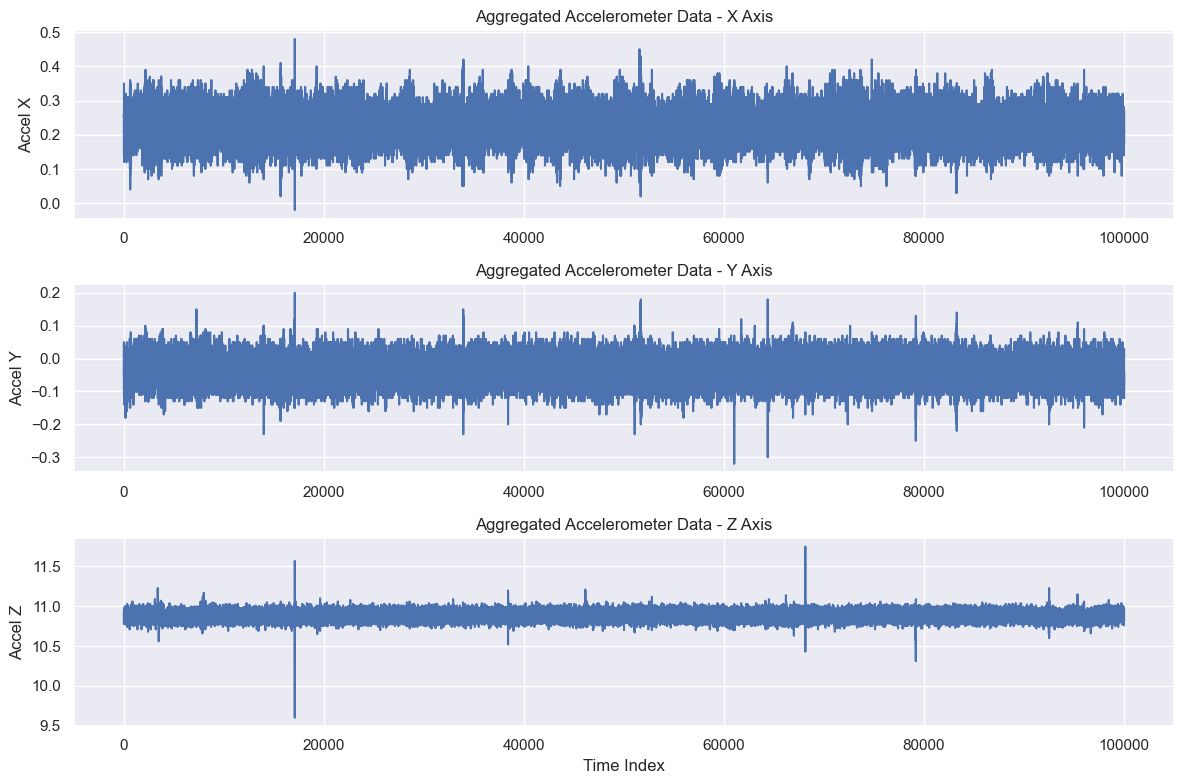

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def load_and_aggregate_files(directory, label):
    files = os.listdir(directory)
    data_list = []

    for file in files:
        if file.startswith(label) and file.endswith('.csv'):
            file_path = os.path.join(directory, file)
            data = pd.read_csv(file_path)
            data_list.append(data)

    return pd.concat(data_list, ignore_index=True)

# Directory containing the data files
directory = './data'

# Load and aggregate data from files with the specified label
label = 'idle'  # Replace with your actual label
aggregated_data = load_and_aggregate_files(directory, label)

# Assuming 'accelX', 'accelY', 'accelZ' are columns in your data
# Setting the theme for seaborn
sns.set_theme(style="darkgrid")

# Creating plots
plt.figure(figsize=(12, 8))

# Plotting Accelerometer Data (X, Y, Z axes)
plt.subplot(3, 1, 1)
plt.plot(aggregated_data['accelX'], label='Accel X')
plt.title('Aggregated Accelerometer Data - X Axis')
plt.ylabel('Accel X')

plt.subplot(3, 1, 2)
plt.plot(aggregated_data['accelY'], label='Accel Y')
plt.title('Aggregated Accelerometer Data - Y Axis')
plt.ylabel('Accel Y')

plt.subplot(3, 1, 3)
plt.plot(aggregated_data['accelZ'], label='Accel Z')
plt.title('Aggregated Accelerometer Data - Z Axis')
plt.ylabel('Accel Z')
plt.xlabel('Time Index')

plt.tight_layout()
plt.show()


In [16]:
import pandas as pd
import os

def load_and_aggregate_files(directory, label):
    files = os.listdir(directory)
    data_list = []

    for file in files:
        if file.startswith(label) and file.endswith('.csv'):
            file_path = os.path.join(directory, file)
            data = pd.read_csv(file_path)
            data_list.append(data)

    return pd.concat(data_list, ignore_index=True)

# Directory containing the data files
directory = './data'

# Load and aggregate data from files with the specified label
label = 'idle'  # Example label
aggregated_data = load_and_aggregate_files(directory, label)

# Check the first few rows of the aggregated data
aggregated_data.head()

,timestamp,accelX,accelY,accelZ,gyroX,gyroY,gyroZ
0,0,0.25,-0.05,10.92,0.01,-0.02,0.01
1,12,0.26,0.04,10.88,0.01,-0.01,0.00
2,25,0.23,-0.05,10.87,0.00,-0.01,0.00
3,38,0.21,0.05,10.84,0.01,-0.01,0.00
4,51,0.15,-0.01,10.87,0.01,-0.01,0.00


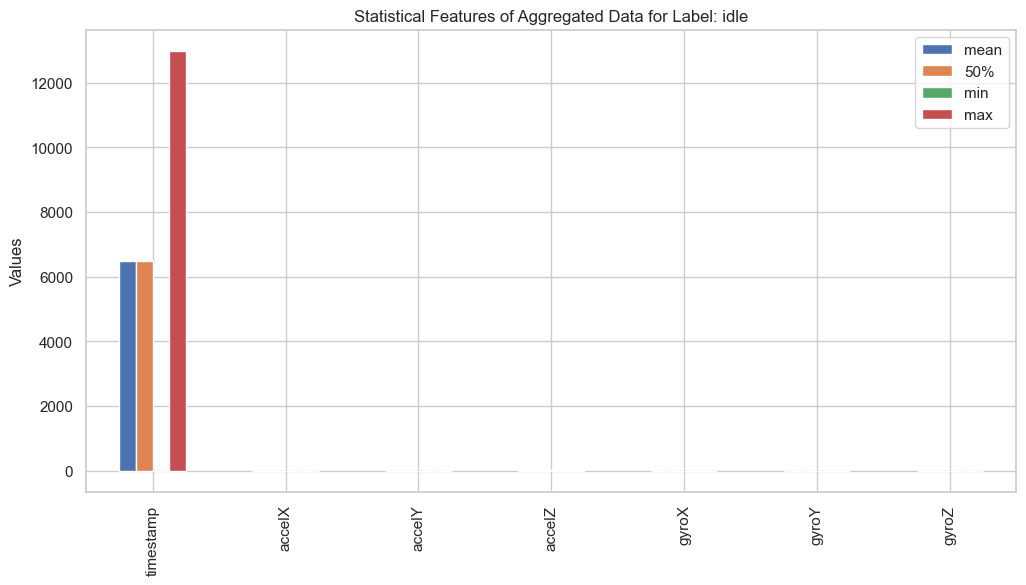

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data aggregation is successful and 'aggregated_data' is correctly loaded

# Calculate statistical features
statistics = aggregated_data.describe()

# Plotting the statistical features
sns.set_theme(style="whitegrid")
statistics.T[['mean', '50%', 'min', 'max']].plot(kind='bar', figsize=(12, 6))
plt.title(f'Statistical Features of Aggregated Data for Label: {label}')
plt.ylabel('Values')
plt.show()


In [18]:
import pandas as pd
import numpy as np
import os

def load_and_aggregate_files(directory, label):
    files = os.listdir(directory)
    data_list = []

    for file in files:
        if file.startswith(label) and file.endswith('.csv'):
            file_path = os.path.join(directory, file)
            data = pd.read_csv(file_path)
            data_list.append(data)

    return pd.concat(data_list, ignore_index=True)

# Load and aggregate data from files with the specified label
directory = './data'
label = 'idle'  # Example label
aggregated_data = load_and_aggregate_files(directory, label)

# Assuming 'accelX', 'accelY', 'accelZ' are columns in your data
# Replace these with actual column names if they are different

# Feature Engineering
# Rolling window statistics
window_size = 5
aggregated_data['rolling_mean_accelX'] = aggregated_data['accelX'].rolling(window=window_size).mean()
aggregated_data['rolling_std_accelX'] = aggregated_data['accelX'].rolling(window=window_size).std()

# FFT for frequency domain features
fft_values_accelX = np.fft.fft(aggregated_data['accelX'])
fft_dom_freq_accelX = np.argmax(np.abs(fft_values_accelX))

# Print the first few rows of the new features
print(aggregated_data[['rolling_mean_accelX', 'rolling_std_accelX']].head())

# Print the dominant frequency for accelX
print(f"Dominant frequency in 'accelX': {fft_dom_freq_accelX}")


   rolling_mean_accelX  rolling_std_accelX
0                  NaN                 NaN
1                  NaN                 NaN
2                  NaN                 NaN
3                  NaN                 NaN
4                 0.22            0.043589
Dominant frequency in 'accelX': 0
